<a href="https://colab.research.google.com/github/Bayusatriapersada/America-Energy-Usage-Stochastic-ARIMA-/blob/master/ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
from numpy import log
from statsmodels.tsa.stattools import acf
# Import data
df2 = pd.read_csv('https://raw.githubusercontent.com/Bayusatriapersada/America-Energy-Usage-Stochastic-ARIMA-/master/Energy%20Usage%20Data.csv', names=['AEP'],header=0)
result = adfuller(df2.AEP.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -16.446812
p-value: 0.000000


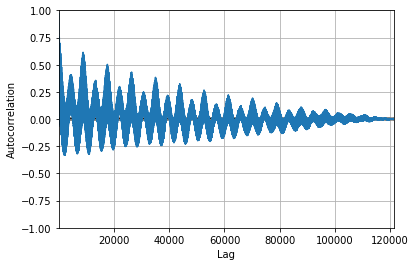

In [0]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df2)


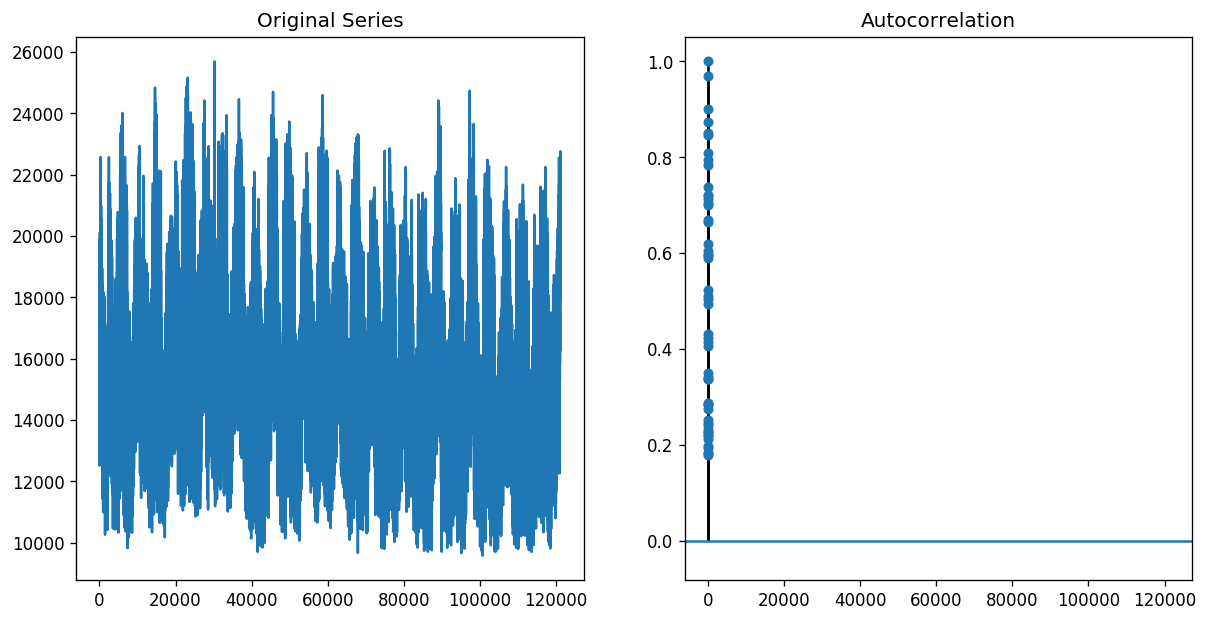

In [0]:
# Original Series
plt.rcParams.update({'figure.figsize':(12,6), 'figure.dpi':120})
fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df2.AEP); axes[0].set_title('Original Series')
plot_acf(df2.AEP, ax=axes[1])
plt.show()

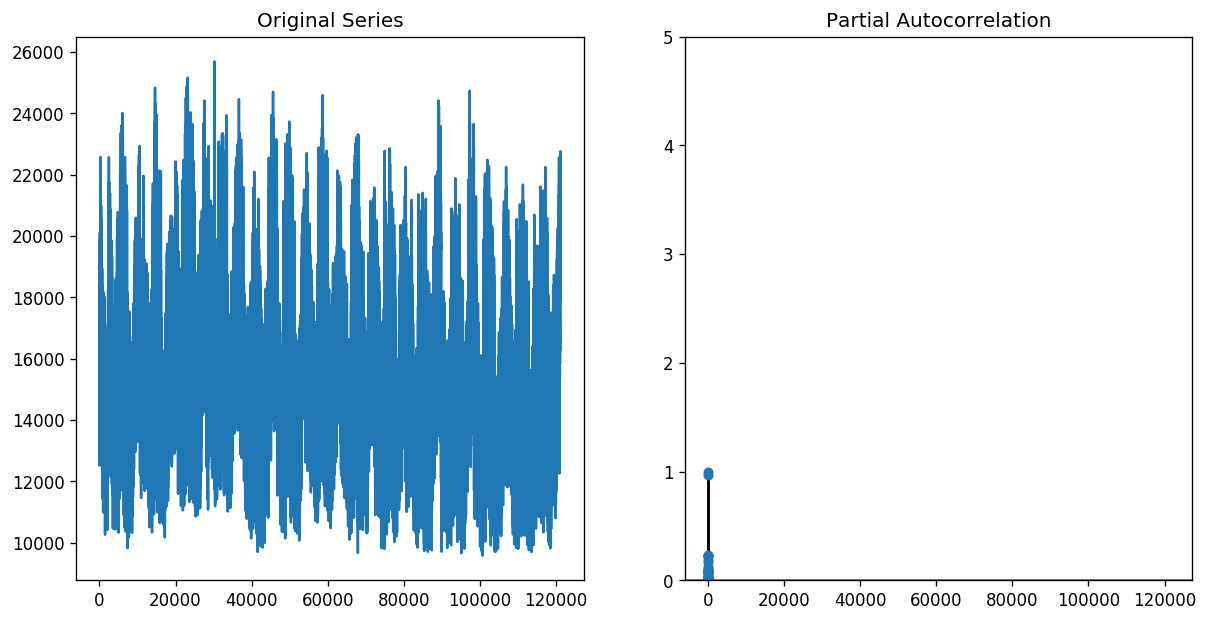

In [0]:
# PACF plot of Original Series
plt.rcParams.update({'figure.figsize':(12,6), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df2.AEP); axes[0].set_title('Original Series')
axes[1].set(ylim=(0,5))
plot_pacf(df2.AEP.dropna(), ax=axes[1])

plt.show()

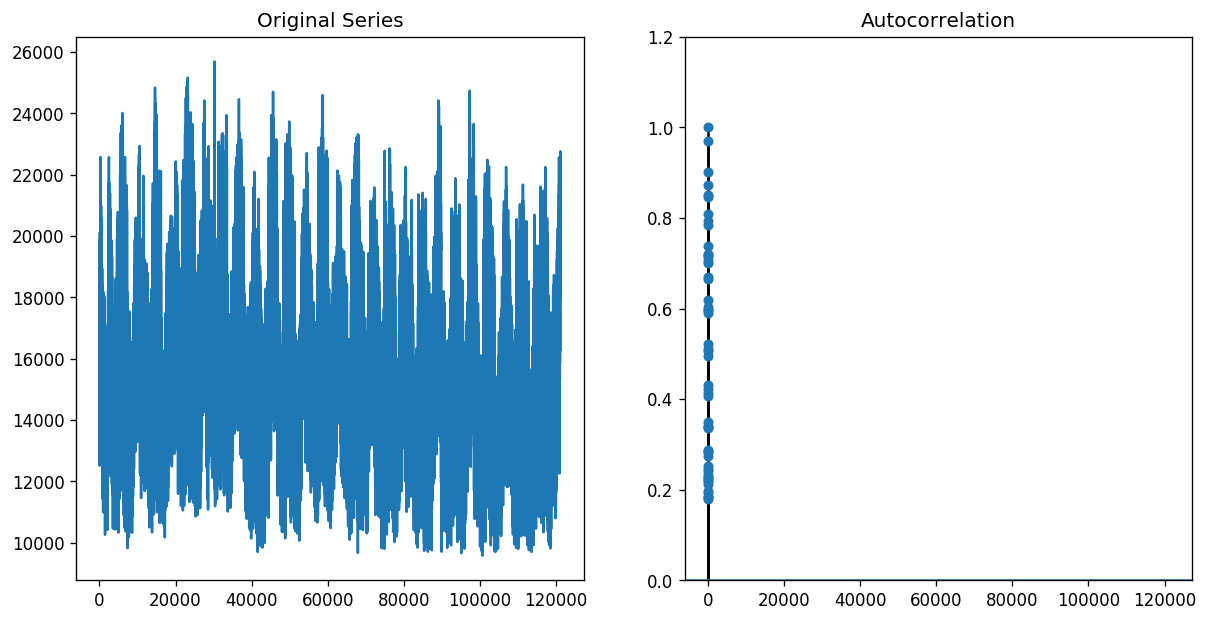

In [0]:
fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df2.AEP); axes[0].set_title('Original Series')
axes[1].set(ylim=(0,1.2))
plot_acf(df2.AEP.dropna(), ax=axes[1])

plt.show()

In [0]:
model = ARIMA(df2.AEP, order=(3,0,3))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:                    AEP   No. Observations:               121273
Model:                     ARMA(3, 3)   Log Likelihood             -915444.723
Method:                       css-mle   S.D. of innovations            459.281
Date:                Sat, 23 Nov 2019   AIC                        1830905.445
Time:                        03:38:16   BIC                        1830983.092
Sample:                             0   HQIC                       1830928.807
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        1.55e+04     39.341    393.982      0.000    1.54e+04    1.56e+04
ar.L1.AEP      2.6094      0.002   1431.004      0.000       2.606       2.613
ar.L2.AEP     -2.5002      0.003   -752.511      0.0

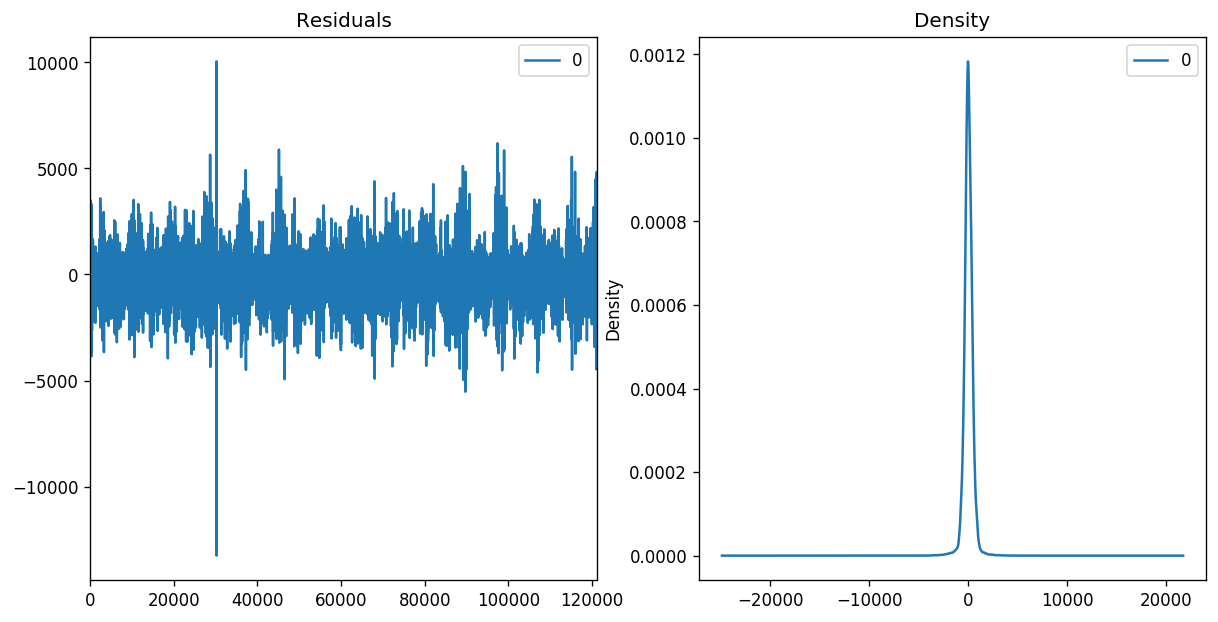

In [0]:
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

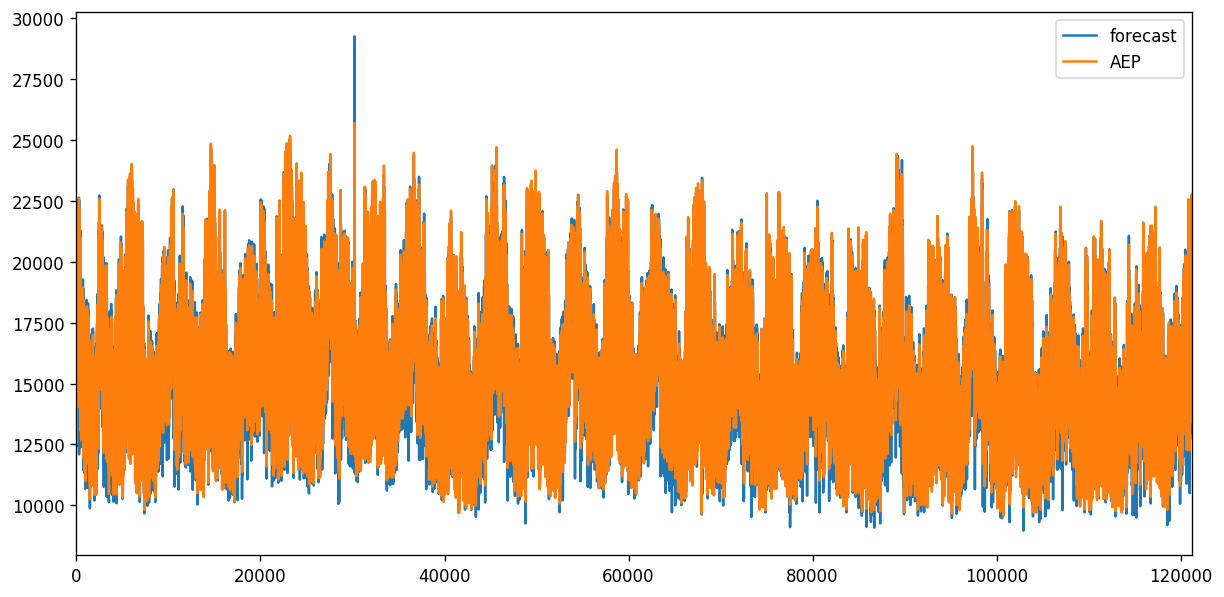

In [0]:
model_fit.plot_predict(dynamic=False)
plt.show()

In [0]:
train = df2.AEP[:90000]
test = df2.AEP[90000:]

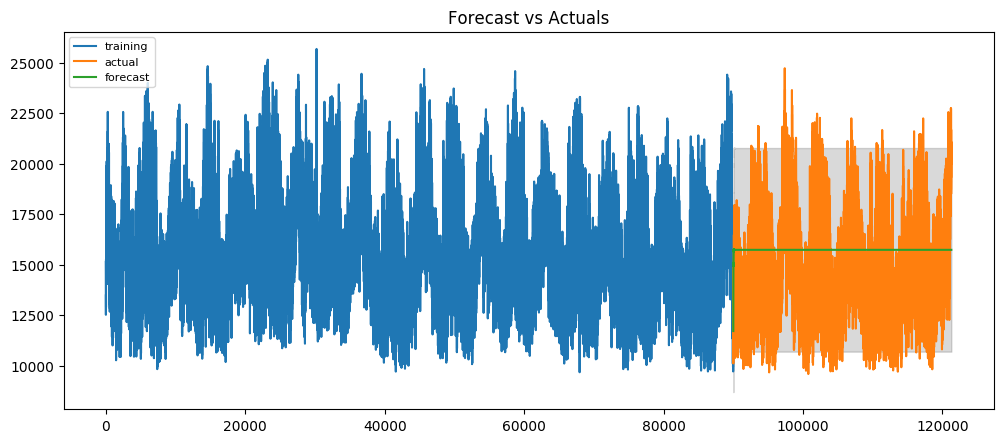

In [22]:
model = ARIMA(train, order=(3,0,3))  
fitted = model.fit(disp=-1)  

# Forecast
fc, se, conf = fitted.forecast(121273-90000, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

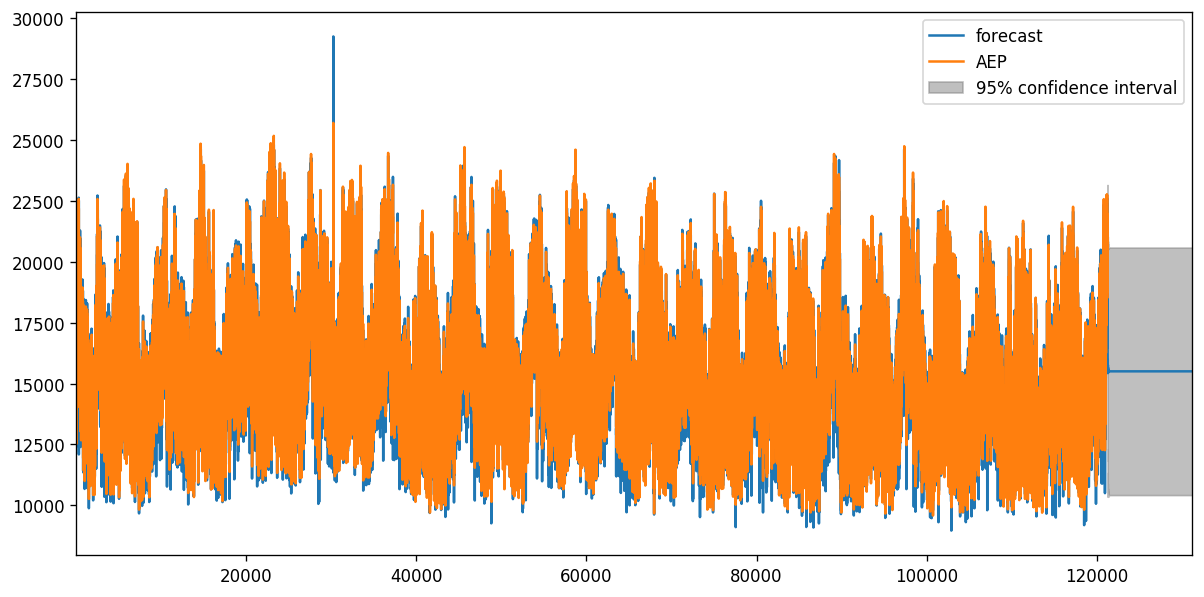

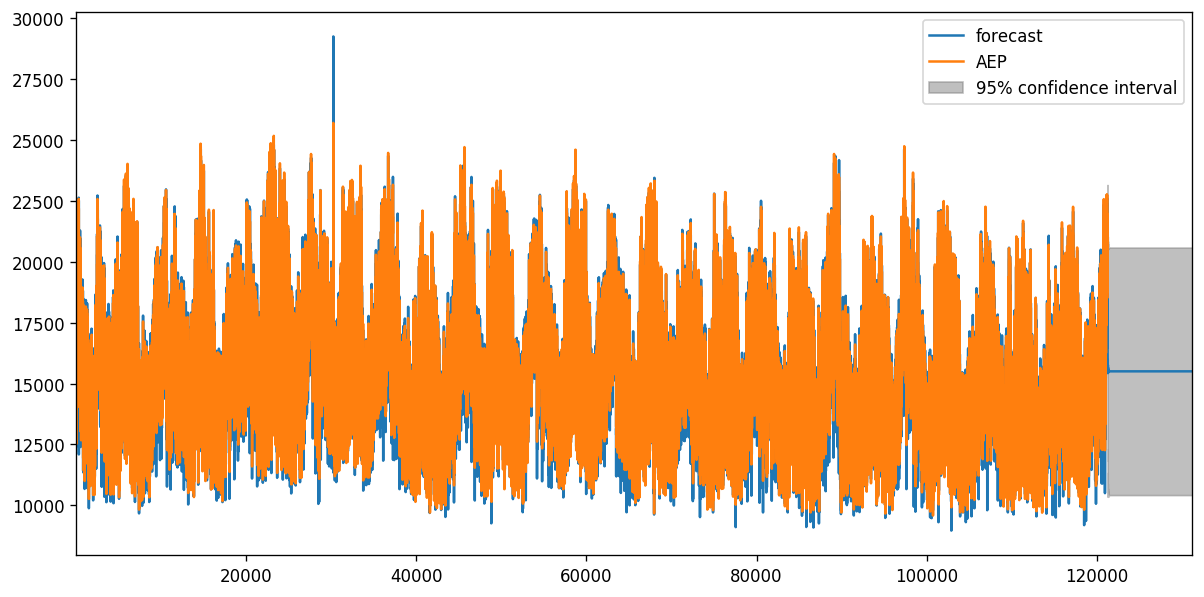

In [24]:
model_fit.plot_predict(1,131273)

In [25]:
pip install pmdarima

     |████████████████████████████████| 1.1MB 9.3MB/s 


In [28]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm

df2 = pd.read_csv('https://raw.githubusercontent.com/Bayusatriapersada/America-Energy-Usage-Stochastic-ARIMA-/master/Energy%20Usage%20Data.csv', names=['AEP'],header=0)

model = pm.auto_arima(df2.AEP, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Fit ARIMA: order=(1, 0, 1); AIC=1864070.622, BIC=1864109.445, Fit time=105.229 seconds
Fit ARIMA: order=(0, 0, 0); AIC=2250561.072, BIC=2250580.483, Fit time=0.018 seconds
Fit ARIMA: order=(1, 0, 0); AIC=1907903.961, BIC=1907933.079, Fit time=0.748 seconds
Fit ARIMA: order=(0, 0, 1); AIC=2105447.662, BIC=2105476.779, Fit time=4.150 seconds
Fit ARIMA: order=(2, 0, 1); AIC=1838919.275, BIC=1838967.804, Fit time=109.042 seconds
Fit ARIMA: order=(2, 0, 0); AIC=1839668.012, BIC=1839706.835, Fit time=6.455 seconds
Fit ARIMA: order=(2, 0, 2); AIC=1838858.138, BIC=1838916.373, Fit time=112.431 seconds
Fit ARIMA: order=(3, 0, 3); AIC=1830905.445, BIC=1830983.092, Fit time=126.475 seconds
Fit ARIMA: order=(2, 0, 3); AIC=1838773.085, BIC=1838841.025, Fit time=115.430 seconds
Fit ARIMA: order=(3, 0, 2); AIC=1831274.782, BIC=1831342.722, Fit time=124.227 seconds
Total fit time: 704.742 seconds
                              ARMA Model Results                              
Dep. Variable:             

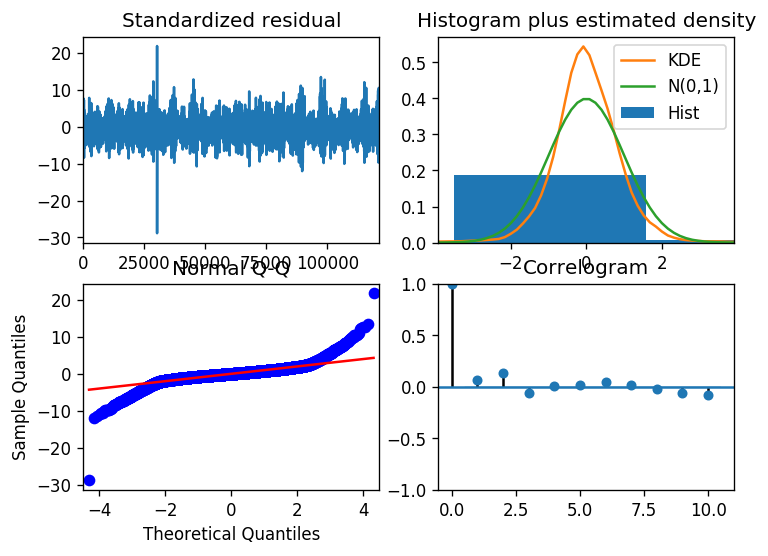

In [29]:
model.plot_diagnostics(figsize=(7,5))
plt.show()

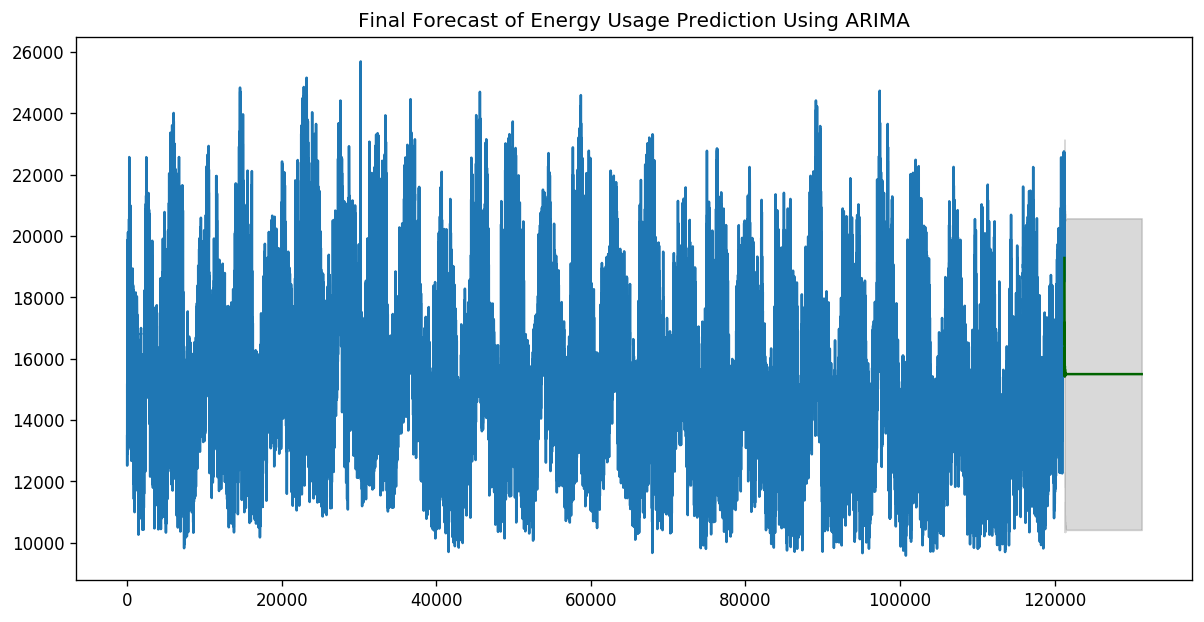

In [30]:
# Forecast
n_periods =  10000 ##untuk 10000 jam selanjutnya
fc, confint = model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.arange(len(df2.AEP), len(df2.AEP)+n_periods)

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(df2.AEP)
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("Final Forecast of Energy Usage Prediction Using ARIMA")
plt.show()